### Lester Dann G. Lopez
### BSCS 3B
### Artificial Intelligence


# Activity Optimizing a Robotic Arm's Trajectory

This notebook demonstrates **Hill Climbing** and **Simulated Annealing** to minimize the total distance of a sequence of points (like a simplified TSP problem). We will:

1. Generate random 2D points.(50 distinct points the Robotic arm will go)
2. Plot the points.
3. Run Hill Climbing and Simulated Annealing.
4. Plot the optimized sequences for better visualization of the motion of the robot.

---

## 1. Import Libraries

In [1]:
import random
import math
import matplotlib.pyplot as plt

* `random` – for generating random numbers and random sampling.
* `math` – for mathematical operations like square root. (like using "e" in Mathematics => math.exp()
* `matplotlib.pyplot` – for plotting points and sequences.

---

## 2. Generate Random Points

In [2]:
def random_points(n=50, x_range=(0, 100), y_range=(0, 100)):
    """
    Generates n random 2D points with integer coordinates. 
    These points represent the robot's target positions.
    
    Args:
        n: number of points
        x_range: tuple indicating min and max x-values
        y_range: tuple indicating min and max y-values
        
    Returns:
        list of (x, y) tuples, example result [(31, 74), (48, 66), (4, 80), (67, 69),....]
    """
    points = [(random.randint(x_range[0], x_range[1]),
               random.randint(y_range[0], y_range[1])) for _ in range(n)]
    return points

points = random_points()
print("50 Random points: ")
print(points)


50 Random points: 
[(64, 77), (45, 18), (15, 31), (44, 94), (44, 66), (27, 74), (76, 57), (28, 80), (6, 72), (44, 95), (36, 49), (83, 56), (26, 83), (97, 94), (90, 92), (3, 8), (66, 46), (27, 96), (88, 40), (66, 84), (51, 49), (26, 92), (91, 19), (22, 21), (56, 48), (31, 4), (83, 40), (14, 9), (57, 2), (71, 50), (96, 89), (27, 74), (44, 30), (75, 62), (15, 72), (65, 52), (2, 7), (7, 71), (92, 63), (79, 82), (58, 51), (35, 4), (26, 87), (64, 98), (31, 90), (33, 8), (68, 99), (60, 1), (93, 62), (96, 72)]


**Explanation:**

* `random.randint(a, b)` generates a **random integer** between `a` and `b`, inclusive.
* We create a list of tuples `(x, y)` for all points.
* Using integers makes the coordinates cleaner and easier to visualize, like real robot positions.

---

## 3. Plot the Generated Points


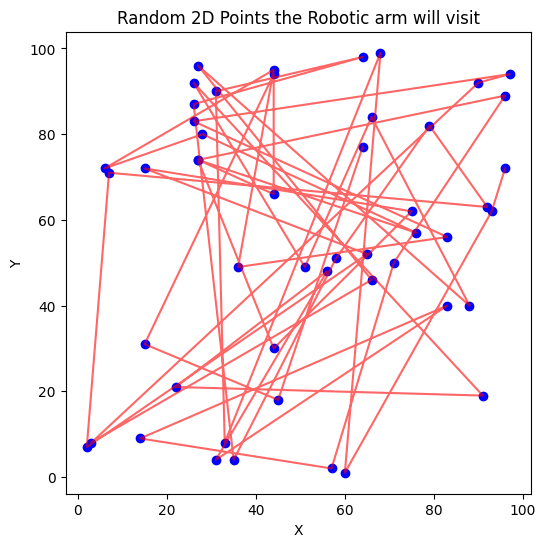

In [3]:
# Extract x and y coordinates
x_vals, y_vals = zip(*points)

plt.figure(figsize=(6,6))
plt.scatter(x_vals, y_vals, color='blue')   # plot points
plt.plot(x_vals, y_vals, color='red', alpha=0.6)  # connect points in sequence
plt.title("Random 2D Points the Robotic arm will visit")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


**Explanation:**

* `plt.scatter` plots the points as dots.
* `plt.plot` connects the points in the **order they appear** in the sequence.
* Now you can see both the positions and the path the robot would follow.

## 4. Energy Function (Total Distance)

In [4]:
# -- The objective function is not defined in the activity so I made my own function --

def energy(sequence):
    """
    Calculates the total energy used based of the sequence. Like how many watts is consumed whenever this sequence is performed by robot. 
    The lower the energy value, the better. 
    
    Args:
        sequence: list of (x, y) points
    
    Returns:
        total distance (float)
    """
    total = 0
    for i in range(len(sequence) - 1):
        x1, y1 = sequence[i]
        x2, y2 = sequence[i+1]
        total += math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        """
        This line calculates the Euclidean distance between two consecutive points and adds it to the total distance of the sequence.
        It’s what your optimization algorithms are trying to minimize—shorter total distance = lower “energy”.
        """
    
    # Optional: add small random noise to simulate a complex landscape
    # total += random.uniform(-5, 5)
    return total

**Explanation:**

* Calculates **Euclidean distance** between consecutive points.
* Adding small noise makes the landscape **more complex**, which is useful for optimization visualization.

---

## 5. Hill Climbing Algorithm

In [5]:
def hill_climbing(sequence, steps=50, iterations=10000):
    """
    Hill Climbing with a fixed number of iterations.
    
    Args:
        sequence: initial sequence of points
        steps: maximum distance between swapped points
        iterations: number of neighbor attempts
    """
    current = sequence[:]
    step_size = steps

    for _ in range(iterations):
        # Swap two points within step_size
        i = random.randint(0, len(current)-1)
        j = (i + random.randint(1, step_size)) % len(current)
        neighbor = current[:]
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]

        # Accept if neighbor improves energy
        if energy(neighbor) < energy(current):
            current = neighbor

    return current, energy(current)


**Explanation:**

1. Copy the original sequence.
2. Randomly select two points and swap them → a neighboring solution.
3. If neighbor is better (lower total distance), accept it.
4. Repeat for a number of iterations.

---

## 6. Simulated Annealing Algorithm

In [6]:
def simulated_annealing(sequence, T_start=50, T_end=1e-3, alpha=0.9999, steps = 50):
    current = sequence[:]
    best = current[:]
    T = T_start
    step_size = steps  # Maximum distance to swap (like a step size)


    # ---------------------TEST Variables to tweak T_start -------------------------    
    delta_E_sum = 0
    count = 0
    max_samples = 10000  # only compute average of first 1000 delta_E

    while T > T_end:  # Remove fixed iterations
        # Randomly swap two points within step_size to create a neighbor
        i = random.randint(0, len(current) - 1)
        j = (i + random.randint(1, step_size)) % len(current)
        neighbor = current[:]
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]

        delta_E = energy(neighbor) - energy(current)
        
        
        # Check this to tweak value of T_start. Comment this part later
        # T_start should be roughly on the same scale as the delta_E
        # ---------------------TEST-------------------------
        
        if count < max_samples:
            delta_E_sum += abs(delta_E)
            count += 1
            if count == max_samples:
                avg_delta_E = delta_E_sum / max_samples
                print(f"Average ΔE of first {max_samples} swaps: {avg_delta_E:.2f}")
        # ----------------------------------------------

        if delta_E < 0:
            current = neighbor  # Always accept better solution
        else:
            p = math.exp(-delta_E / T)  # Probabilistic acceptance
            if random.random() < p:
                current = neighbor

        if energy(current) < energy(best):
            best = current[:]

        # Cool down temperature
        T *= alpha

    return best, energy(best)

**Explanation:**

* `delta_E` = change in total distance.
* If `delta_E < 0`, accept the new sequence (better solution).
* If `delta_E > 0`, accept with probability `p = exp(-delta_E/T)` → allows **escaping local minima**.
* Temperature `T` gradually decreases (`T *= alpha`) → less likely to accept worse solutions over time.

---

## 7. Run Hill Climbing and Simulated Annealing

In [7]:
hc_seq, hc_energy = hill_climbing(points)
sa_seq, sa_energy = simulated_annealing(points)

print("Hill Climbing total distance:", hc_energy)
print("Simulated Annealing total distance:", sa_energy)

Average ΔE of first 10000 swaps: 77.37
Hill Climbing total distance: 782.2176534504254
Simulated Annealing total distance: 569.8076469376438


---

## 8. Plot Optimized Sequences

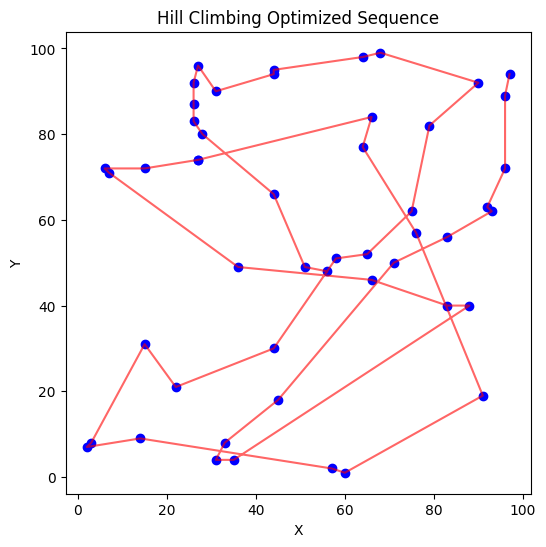

[(56, 48), (51, 49), (44, 66), (28, 80), (26, 83), (26, 87), (26, 92), (27, 96), (31, 90), (44, 94), (44, 95), (64, 98), (68, 99), (90, 92), (79, 82), (75, 62), (65, 52), (58, 51), (44, 30), (22, 21), (15, 31), (3, 8), (2, 7), (14, 9), (57, 2), (60, 1), (91, 19), (76, 57), (64, 77), (66, 84), (27, 74), (27, 74), (15, 72), (6, 72), (7, 71), (36, 49), (66, 46), (83, 40), (88, 40), (35, 4), (31, 4), (33, 8), (45, 18), (71, 50), (83, 56), (93, 62), (92, 63), (96, 72), (96, 89), (97, 94)]


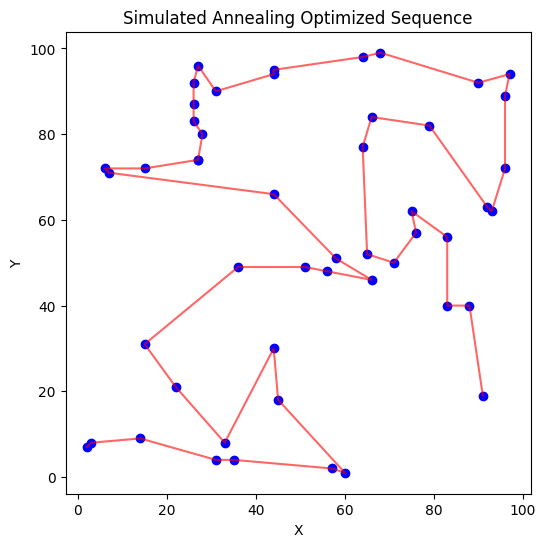

[(2, 7), (3, 8), (14, 9), (31, 4), (35, 4), (57, 2), (60, 1), (45, 18), (44, 30), (33, 8), (22, 21), (15, 31), (36, 49), (51, 49), (56, 48), (66, 46), (58, 51), (44, 66), (7, 71), (6, 72), (15, 72), (27, 74), (27, 74), (28, 80), (26, 83), (26, 87), (26, 92), (27, 96), (31, 90), (44, 94), (44, 95), (64, 98), (68, 99), (90, 92), (97, 94), (96, 89), (96, 72), (93, 62), (92, 63), (79, 82), (66, 84), (64, 77), (65, 52), (71, 50), (76, 57), (75, 62), (83, 56), (83, 40), (88, 40), (91, 19)]


In [8]:
def plot_sequence(sequence, title):
    x_vals, y_vals = zip(*sequence)
    plt.figure(figsize=(6,6))
    plt.scatter(x_vals, y_vals, color='blue')
    plt.plot(x_vals, y_vals, color='red', alpha=0.6)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

plot_sequence(hc_seq, "Hill Climbing Optimized Sequence")
print(hc_seq)
plot_sequence(sa_seq, "Simulated Annealing Optimized Sequence")
print(sa_seq)

**Explanation:**

* Shows points as dots and the path connecting them as lines.
* You can visually compare **HC vs SA** performance.